In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import pandas as pd
import os

In [48]:
train_data = pd.read_csv(
    r"/home/hany_jr/Ai/Tensorflow-tutorial/Dataset/Multi_Digit_Mnist/train.csv"
)
test_data = pd.read_csv(
    r"/home/hany_jr/Ai/Tensorflow-tutorial/Dataset/Multi_Digit_Mnist/test.csv"
)

In [49]:
test_data.head()

,Image,first_num,second_num
0,0_02.png,0,2
1,100_02.png,0,2
2,101_02.png,0,2
3,102_02.png,0,2
4,103_02.png,0,2


In [50]:
train_images = (
    "/home/hany_jr/Ai/Tensorflow-tutorial/Dataset/Multi_Digit_Mnist/train_images/"
    + train_data.iloc[:, 0]
)
test_images = (
    "/home/hany_jr/Ai/Tensorflow-tutorial/Dataset/Multi_Digit_Mnist/test_images/"
    + test_data.iloc[:, 0]
)

train_labels = train_data.iloc[:, 1:]
test_labels = test_data.iloc[:, 1:]

In [51]:
def read_image(image_path, label):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=1)

    image.set_shape((64, 64, 1))
    label[0].set_shape([])
    label[1].set_shape([])

    label = {"first_digit": label[0], "second_digit": label[1]}

    return image, label

In [52]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

train_dataset = (
    train_dataset.shuffle(buffer_size=len(train_labels))
    .map(read_image)
    .batch(32)
    .prefetch(4)
)


test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

test_dataset = test_dataset.map(read_image).batch(32).prefetch(4)

In [55]:
def load_model():

    inputs = tf.keras.Input(shape=(64, 64, 1))

    layer1 = Conv2D(32, (3, 3), activation="relu")(inputs)
    layer2 = MaxPooling2D((2, 2))(layer1)
    layer3 = Conv2D(64, (3, 3), activation="relu")(layer2)
    layer4 = MaxPooling2D((2, 2))(layer3)
    layer5 = Conv2D(64, (3, 3), activation="relu")(layer4)
    layer6 = Flatten()(layer5)
    layer7 = Dense(64, activation="relu")(layer6)
    first_digit = Dense(10, activation="softmax", name="first_digit")(layer7)
    second_digit = Dense(10, activation="softmax", name="second_digit")(layer7)

    model = tf.keras.Model(inputs=inputs, outputs=[first_digit, second_digit])
    
    return model

In [56]:
multi_digit_model = load_model()

multi_digit_model.compile(
    optimizer=Adam(),
    loss={"first_digit": sparse_categorical_crossentropy, "second_digit": sparse_categorical_crossentropy},
    metrics=["accuracy", "accuracy"],
)
multi_digit_model.fit(train_dataset, epochs=10)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - first_digit_accuracy: 0.6946 - first_digit_loss: 1.1059 - loss: 2.2169 - second_digit_accuracy: 0.6746 - second_digit_loss: 1.1110
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - first_digit_accuracy: 0.9714 - first_digit_loss: 0.0882 - loss: 0.1838 - second_digit_accuracy: 0.9707 - second_digit_loss: 0.0956
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - first_digit_accuracy: 0.9825 - first_digit_loss: 0.0568 - loss: 0.1171 - second_digit_accuracy: 0.9804 - second_digit_loss: 0.0603
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - first_digit_accuracy: 0.9854 - first_digit_loss: 0.0433 - loss: 0.0883 - second_digit_accuracy: 0.9851 - second_digit_loss: 0.0449
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - first_digit_accuracy: 0.9877 - first_digit_loss: 0.0377 - loss: 0.0743 - second_digit_accuracy: 0.9880 - second_digit_loss: 0.0366
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step

In [74]:


image = test_dataset.take(1).as_numpy_iterator().next()[0]

singel_image = image[1] 
singel_image = singel_image.reshape(1, 64, 64, 1)
predictions = multi_digit_model.predict(singel_image)
first_digit = predictions[0].argmax(), second_digit = predictions[1].argmax()
first_digit, second_digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(0, 2)

Text(0.5, 1.0, 'Predicted: 0, 2')

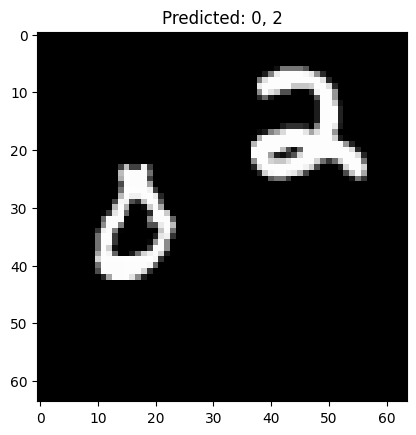

In [76]:
import matplotlib.pyplot as plt
plt.imshow(singel_image.reshape(64, 64), cmap="gray")
plt.title(f"Predicted: {first_digit}, {second_digit}")